<a href="https://colab.research.google.com/github/Wishmi-Sasika/DermascopeAI/blob/Eczema/backend/Notebooks/Eczema_Severity_Assessment_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Dataset Exploration

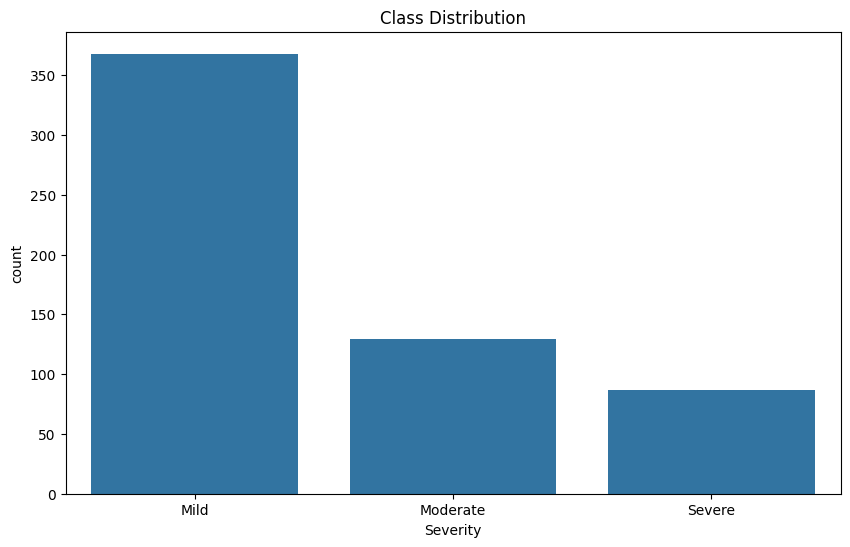

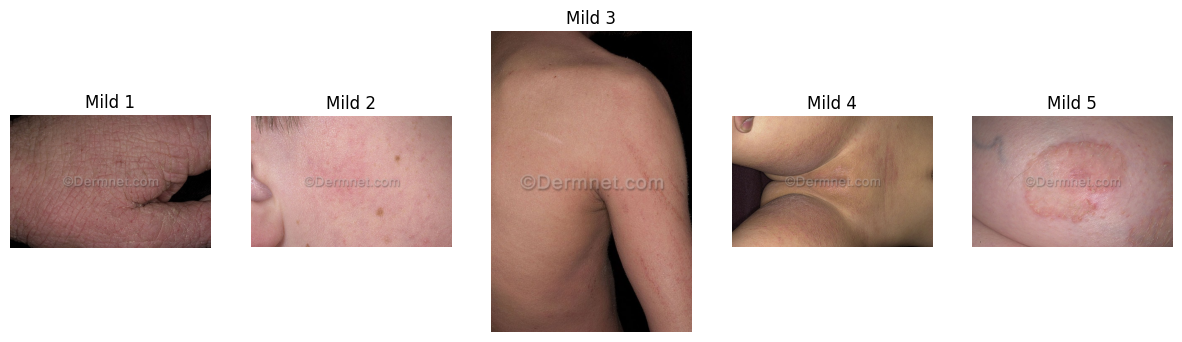

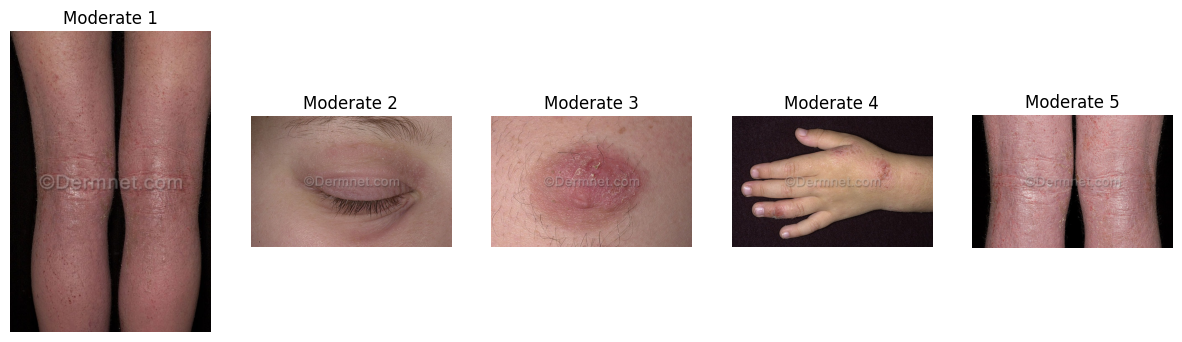

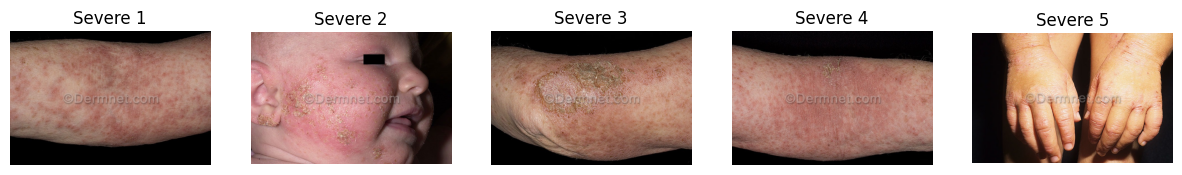

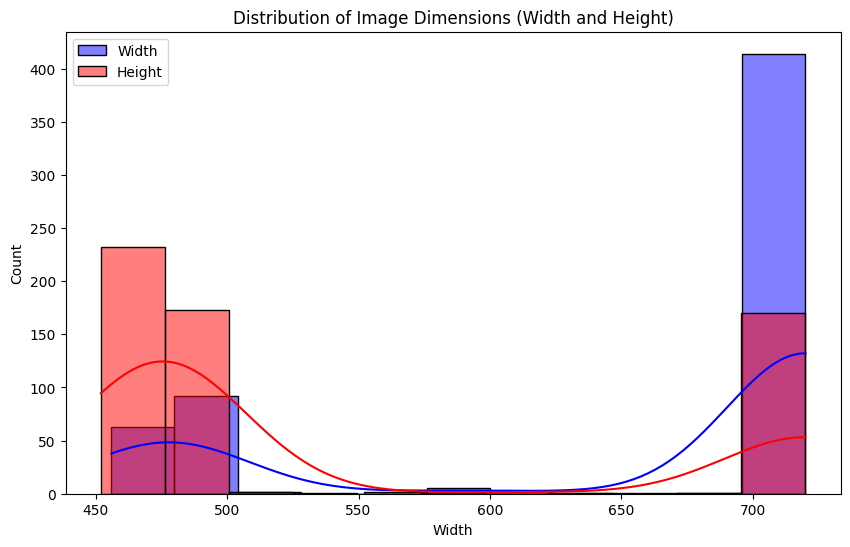

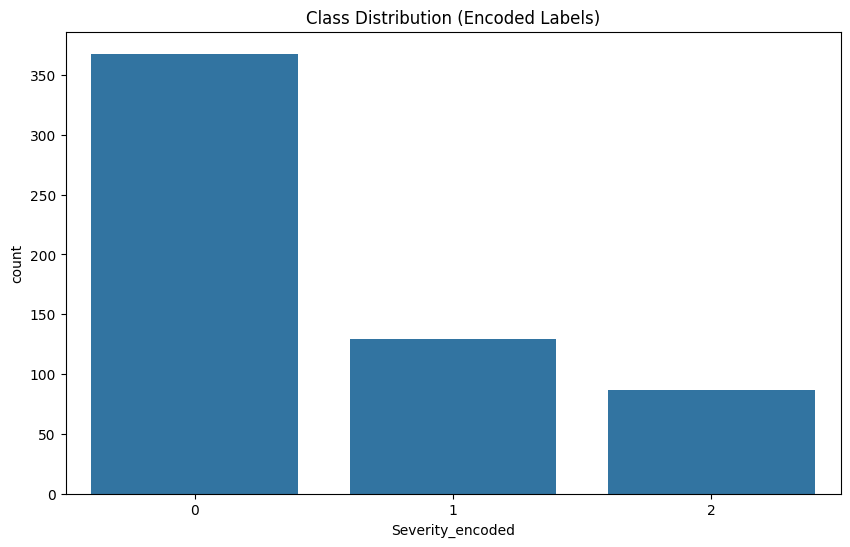

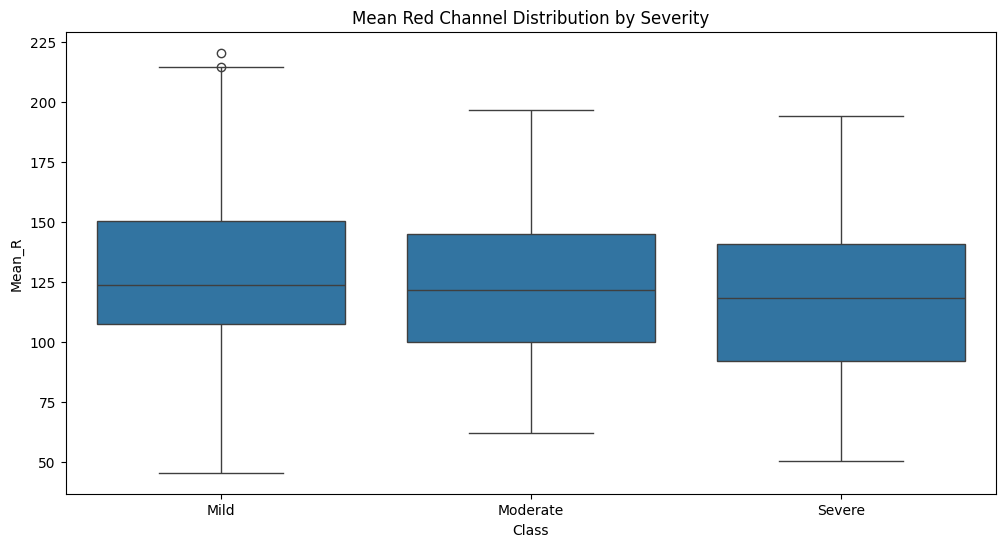

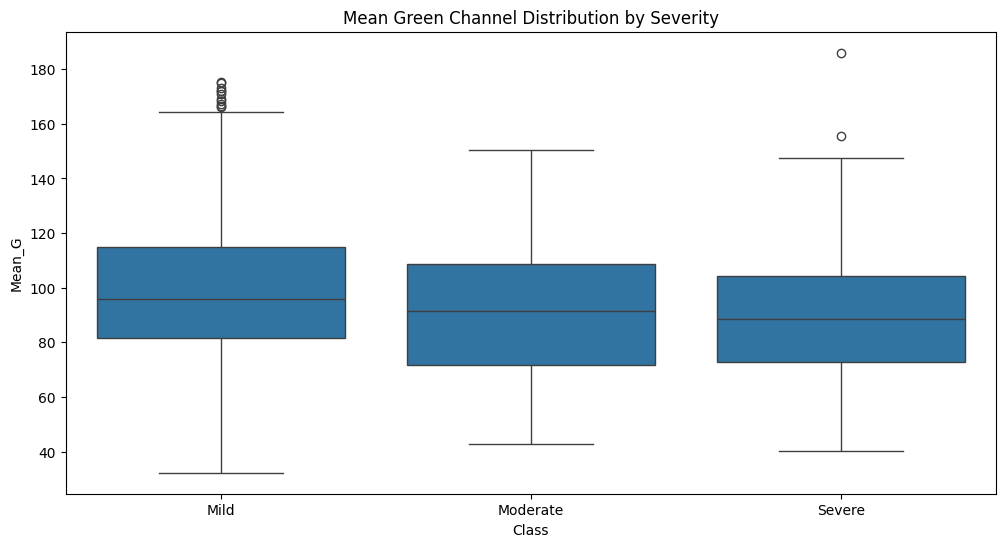

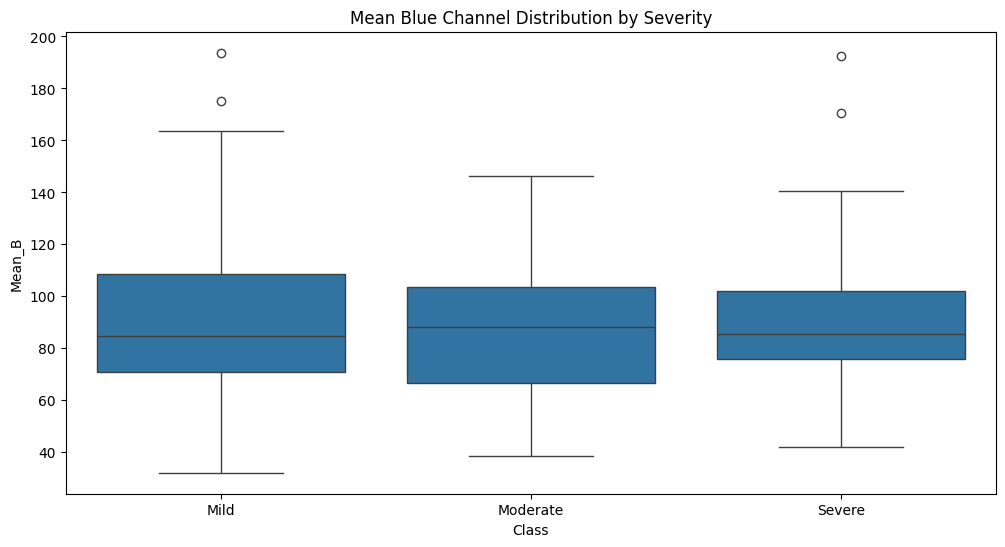

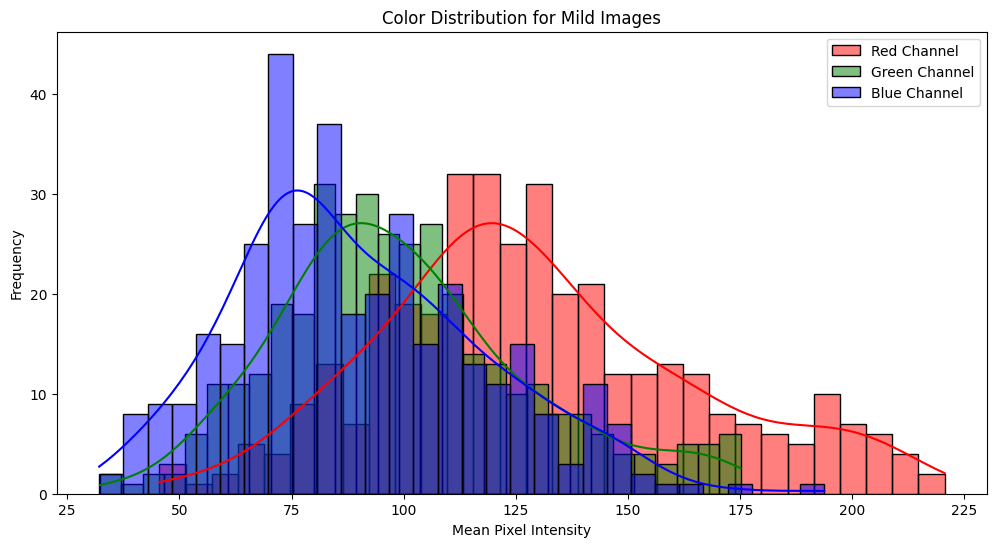

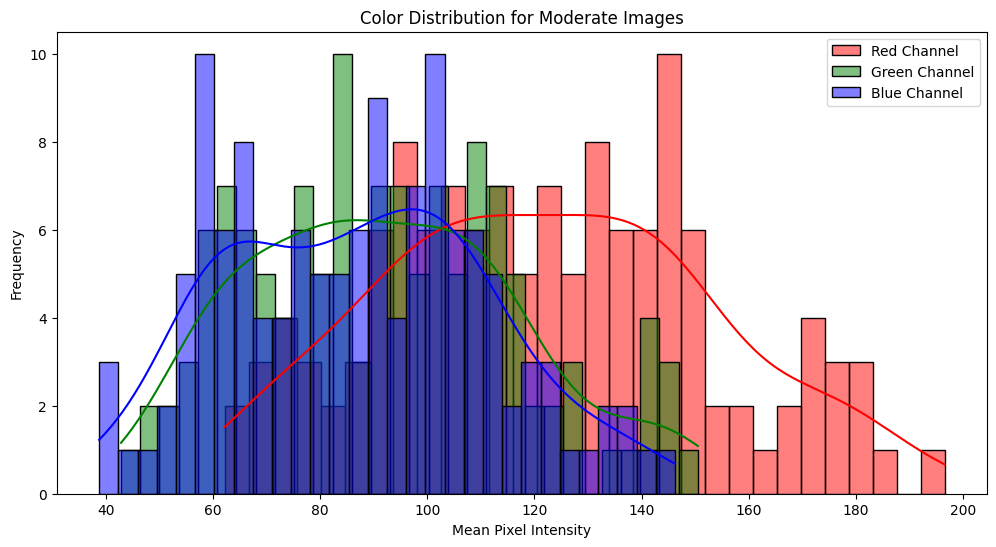

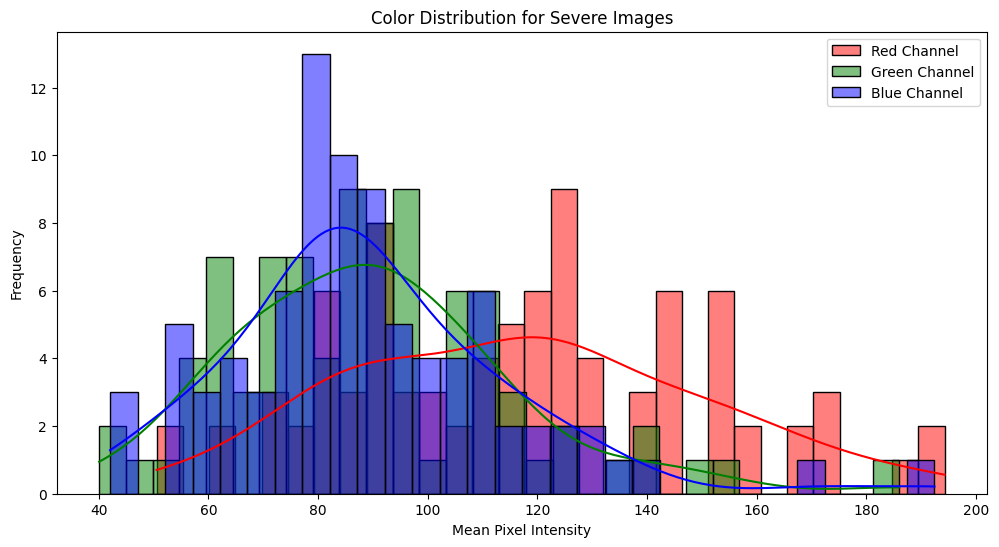

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import pandas as pd

# Set the paths to your dataset
mild_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Mild"
moderate_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Moderate"
severe_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Severe"

# Get the list of image filenames for each category
mild_images = os.listdir(mild_path)
moderate_images = os.listdir(moderate_path)
severe_images = os.listdir(severe_path)

# Create a DataFrame for exploration
data = []
for img in mild_images:
    data.append([img, 'Mild'])
for img in moderate_images:
    data.append([img, 'Moderate'])
for img in severe_images:
    data.append([img, 'Severe'])

df = pd.DataFrame(data, columns=["Image", "Severity"])

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=df)
plt.title("Class Distribution")
plt.show()

# Show a few example images
def show_images(image_folder, label, n_images=5):
    plt.figure(figsize=(15, 5))
    images = os.listdir(image_folder)[:n_images]
    for i, img_name in enumerate(images):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n_images, i + 1)
        plt.imshow(img)
        plt.title(f'{label} {i + 1}')
        plt.axis('off')
    plt.show()

# Show Mild images
show_images(mild_path, "Mild", 5)

# Show Moderate images
show_images(moderate_path, "Moderate", 5)

# Show Severe images
show_images(severe_path, "Severe", 5)

# Explore Image size distribution
image_sizes = []
for folder in [mild_path, moderate_path, severe_path]:
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        image_sizes.append(img.size)

# Convert to DataFrame for easier plotting
image_sizes_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])

# Plot image dimensions distribution
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes_df['Width'], kde=True, color='blue', label="Width")
sns.histplot(image_sizes_df['Height'], kde=True, color='red', label="Height")
plt.legend()
plt.title("Distribution of Image Dimensions (Width and Height)")
plt.show()

# Check for class imbalance using the LabelEncoder
le = LabelEncoder()
df['Severity_encoded'] = le.fit_transform(df['Severity'])

# Plot the imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity_encoded', data=df)
plt.title("Class Distribution (Encoded Labels)")
plt.show()

# Display image example statistics (mean and standard deviation)
def get_image_statistics(image_folder):
    img_sizes = []
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        img_sizes.append(img_array.mean(axis=(0, 1)))

    return np.array(img_sizes)

# Mean and std of the Mild class images
mild_stats = get_image_statistics(mild_path)
moderate_stats = get_image_statistics(moderate_path)
severe_stats = get_image_statistics(severe_path)

# Combine stats
stats_df = pd.DataFrame({
    "Class": ["Mild"] * len(mild_stats) + ["Moderate"] * len(moderate_stats) + ["Severe"] * len(severe_stats),
    "Mean_R": np.concatenate([mild_stats[:, 0], moderate_stats[:, 0], severe_stats[:, 0]]),
    "Mean_G": np.concatenate([mild_stats[:, 1], moderate_stats[:, 1], severe_stats[:, 1]]),
    "Mean_B": np.concatenate([mild_stats[:, 2], moderate_stats[:, 2], severe_stats[:, 2]]),
})

# Plot mean values per class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Mean_R', data=stats_df)
plt.title("Mean Red Channel Distribution by Severity")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Mean_G', data=stats_df)
plt.title("Mean Green Channel Distribution by Severity")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Mean_B', data=stats_df)
plt.title("Mean Blue Channel Distribution by Severity")
plt.show()

# Function to calculate and visualize color distribution
def plot_color_distribution(image_folder, label):
    color_means = []

    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        img_array = np.array(img)

        # Calculate mean for each channel (R, G, B)
        if img_array.ndim == 3:  # Ensure the image has color channels
            mean_r = img_array[:, :, 0].mean()
            mean_g = img_array[:, :, 1].mean()
            mean_b = img_array[:, :, 2].mean()
            color_means.append([mean_r, mean_g, mean_b])

    # Convert to DataFrame
    color_means = np.array(color_means)
    color_df = pd.DataFrame(color_means, columns=['Red', 'Green', 'Blue'])

    # Plot color distributions
    plt.figure(figsize=(12, 6))
    sns.histplot(color_df['Red'], kde=True, color='red', label='Red Channel', bins=30)
    sns.histplot(color_df['Green'], kde=True, color='green', label='Green Channel', bins=30)
    sns.histplot(color_df['Blue'], kde=True, color='blue', label='Blue Channel', bins=30)
    plt.title(f"Color Distribution for {label} Images")
    plt.xlabel("Mean Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot color distributions for each class
plot_color_distribution(mild_path, "Mild")
plot_color_distribution(moderate_path, "Moderate")
plot_color_distribution(severe_path, "Severe")

EfficientNetB0

Shape of X_train: (467, 224, 224, 3)
Shape of X_val: (117, 224, 224, 3)
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3923 - loss: 1.0610
Epoch 1: val_loss improved from inf to 1.09227, saving model to efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3929 - loss: 1.0623 - val_accuracy: 0.6325 - val_loss: 1.0923 - learning_rate: 1.0000e-05
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5055 - loss: 1.0798
Epoch 2: val_loss did not improve from 1.09227
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5036 - loss: 1.0804 - val_accuracy: 0.2051 - val_loss: 1.0966 - learning_rate: 1.0000e-05
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3142 - loss: 1.1436
Epoch 3: val_loss did not improve from 1.09227
30/30 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3143 - loss: 1.1422 - val_accuracy: 0.2051 - val_loss: 1.1005 - learning_rate: 1.0000e-05
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3448

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


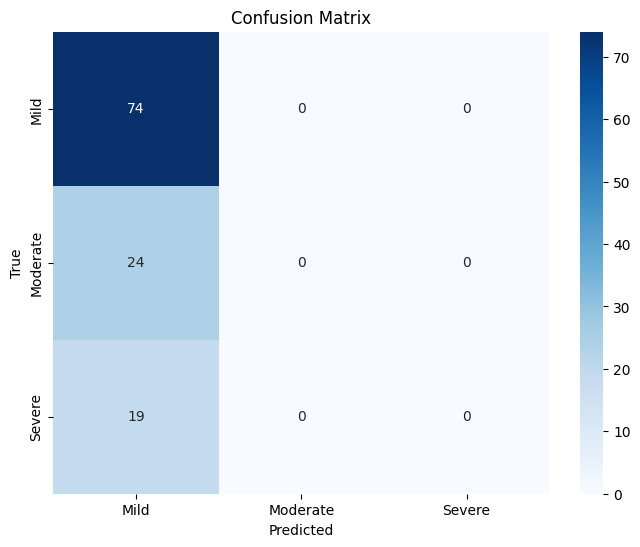

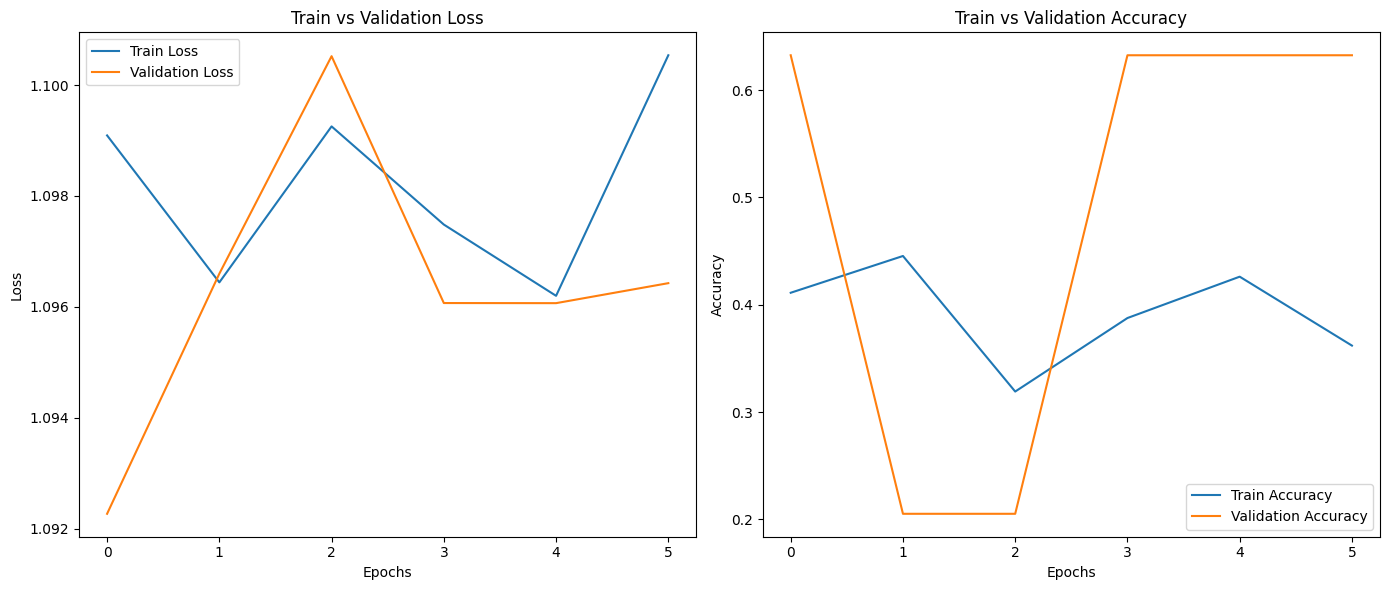

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Helper function to load and preprocess images
def load_images_and_labels(mild_path, moderate_path, severe_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    images = []
    labels = []

    for img_file in os.listdir(mild_path):
        img = load_img(os.path.join(mild_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(0)  # Mild class label

    for img_file in os.listdir(moderate_path):
        img = load_img(os.path.join(moderate_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(1)  # Moderate class label

    for img_file in os.listdir(severe_path):
        img = load_img(os.path.join(severe_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(2)  # Severe class label

    return np.array(images), np.array(labels)

# Set the paths to your dataset
mild_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Mild"
moderate_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Moderate"
severe_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Severe"

images, labels = load_images_and_labels(mild_path, moderate_path, severe_path)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build Simplified EfficientNetB0 Model
def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Compile the Model
model = build_efficientnet_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the Model
history = model.fit(
    X_train,
    tf.keras.utils.to_categorical(y_train, num_classes=3),
    validation_data=(X_val, tf.keras.utils.to_categorical(y_val, num_classes=3)),
    epochs=50,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("efficientnet_model.keras", save_best_only=True, verbose=1),
    ]
)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, target_names=["Mild", "Moderate", "Severe"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Mild", "Moderate", "Severe"], yticklabels=["Mild", "Moderate", "Severe"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy and Loss Plots
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

With attention mechanism

Shape of X_train: (467, 224, 224, 3)
Shape of X_val: (117, 224, 224, 3)
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5415 - loss: 10.8427  
Epoch 1: val_loss improved from inf to 10.45429, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5406 - loss: 10.8397 - val_accuracy: 0.2051 - val_loss: 10.4543 - learning_rate: 1.0000e-04
Epoch 2/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4935 - loss: 10.4164
Epoch 2: val_loss improved from 10.45429 to 10.10068, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.4944 - loss: 10.4104 - val_accuracy: 0.2051 - val_loss: 10.1007 - learning_rate: 9.9901e-05
Epoch 3/50
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5850 - loss: 9.9946
Epoch 3: val_loss improved from 10.10068 to 9.73548, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━

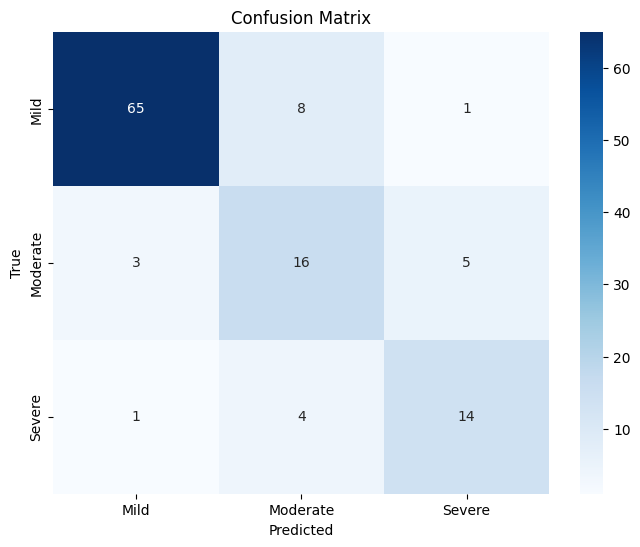

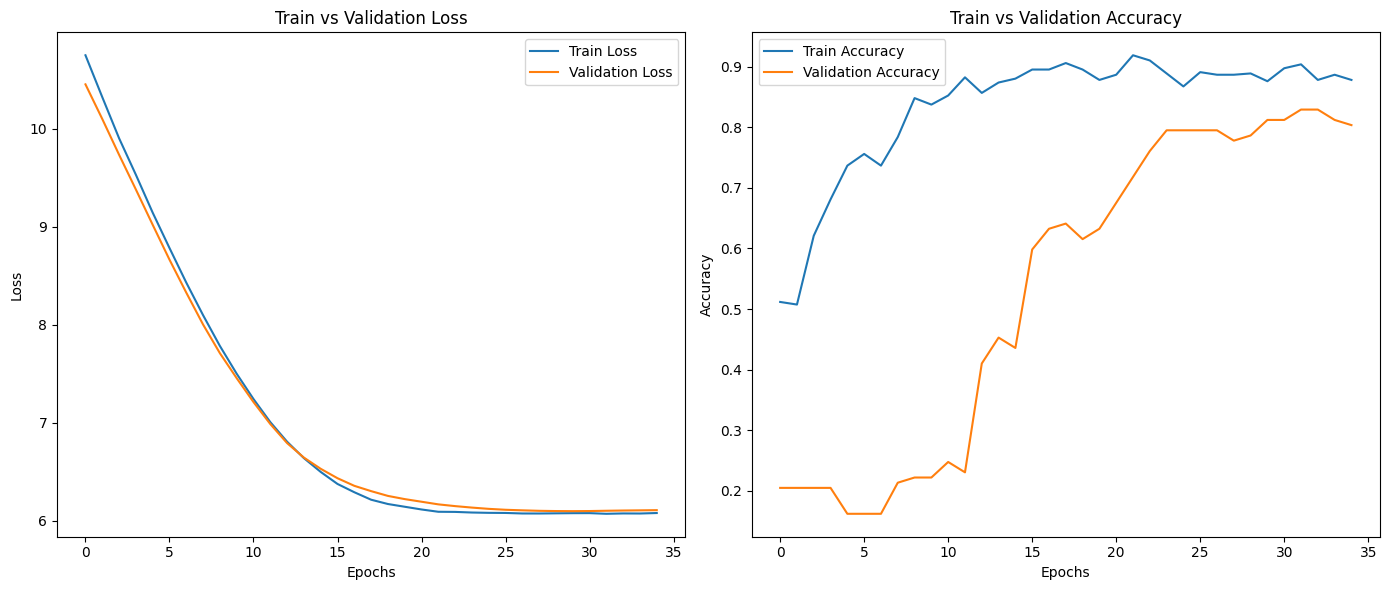

Severity assessment model saved.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
import math

# Helper function to load and preprocess images
def load_images_and_labels(mild_path, moderate_path, severe_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    images = []
    labels = []

    for img_file in os.listdir(mild_path):
        img = load_img(os.path.join(mild_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(0)  # Mild class label

    for img_file in os.listdir(moderate_path):
        img = load_img(os.path.join(moderate_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(1)  # Moderate class label

    for img_file in os.listdir(severe_path):
        img = load_img(os.path.join(severe_path, img_file), target_size=target_size)
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        labels.append(2)  # Severe class label

    return np.array(images), np.array(labels)

# Focal Loss Function
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        focal_loss = alpha * tf.math.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(focal_loss, axis=1)
    return focal_loss_fixed

# Cosine Decay Learning Rate Scheduler
def cosine_decay(epoch, initial_lr=1e-4, epochs=50):
    lr = initial_lr * 0.5 * (1 + math.cos(math.pi * epoch / epochs))
    return lr

# Set the dataset path
mild_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Mild"
moderate_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Moderate"
severe_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Severe"

images, labels = load_images_and_labels(mild_path, moderate_path, severe_path)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build Enhanced EfficientNetB0 Model
def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Fine-tune the base model

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)  # Add batch normalization for stability
    x = Dense(512, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Compile the Model
model = build_efficientnet_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=["accuracy"]
)

# Train the Model
history = model.fit(
    X_train,
    tf.keras.utils.to_categorical(y_train, num_classes=3),
    validation_data=(X_val, tf.keras.utils.to_categorical(y_val, num_classes=3)),
    epochs=50,
    batch_size=16,
    class_weight=class_weight_dict,
    callbacks=[
        LearningRateScheduler(cosine_decay),
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("enhanced_efficientnet_model.keras", save_best_only=True, verbose=1),
    ]
)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, target_names=["Mild", "Moderate", "Severe"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Mild", "Moderate", "Severe"], yticklabels=["Mild", "Moderate", "Severe"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy and Loss Plots
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Train vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('Eczema_Severity_Assessment_Model_EfficientNetB0.h5')
print("Severity assessment model saved.")

With color conversion and data augmention

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3182 - loss: 10.9672
Epoch 1: val_loss improved from inf to 10.51323, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.3205 - loss: 10.9621 - val_accuracy: 0.6325 - val_loss: 10.5132 - learning_rate: 1.0000e-04
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4597 - loss: 10.5364
Epoch 2: val_loss improved from 10.51323 to 10.21177, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.4585 - loss: 10.5338 - val_accuracy: 0.2051 - val_loss: 10.2118 - learning_rate: 9.9901e-05
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4624 - loss: 10.2125
Epoch 3: val_loss improved from 10.21177 to 9.92349, saving model to enhanced_efficientnet_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.4631 - loss: 10.2100 - val_accuracy: 0.6325 - val_loss: 9.9235 - learning_rate: 9.9507e-05
Epoch 4

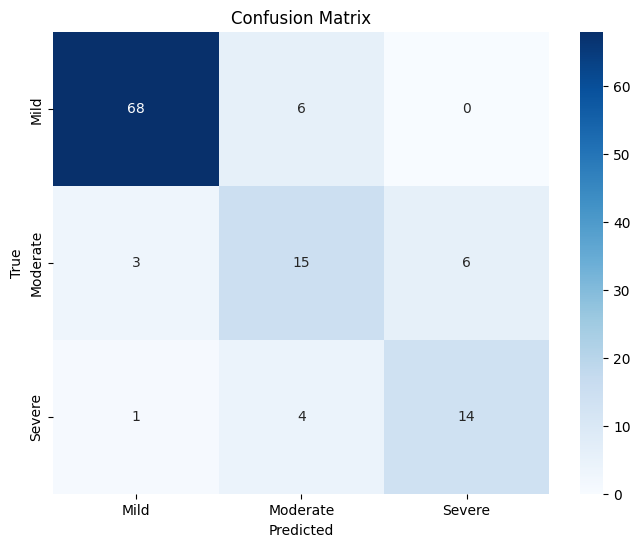

Severity assessment model saved.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import cv2
import math

# Helper function to load and preprocess images
def load_images_and_labels(mild_path, moderate_path, severe_path, target_size=(224, 224)):
    images = []
    labels = []
    for img_file in os.listdir(mild_path):
        img = cv2.imread(os.path.join(mild_path, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, target_size)  # Resize to target dimensions
        images.append(img / 255.0)  # Normalize pixel values to [0, 1]
        labels.append(0)  # Mild class label

    for img_file in os.listdir(moderate_path):
        img = cv2.imread(os.path.join(moderate_path, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, target_size)  # Resize to target dimensions
        images.append(img / 255.0)  # Normalize pixel values to [0, 1]
        labels.append(1)  # Moderate class label

    for img_file in os.listdir(severe_path):
        img = cv2.imread(os.path.join(severe_path, img_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, target_size)  # Resize to target dimensions
        images.append(img / 255.0)  # Normalize pixel values to [0, 1]
        labels.append(2)  # Severe class label

    return np.array(images), np.array(labels)

# Data Augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally
    height_shift_range=0.2,      # Shift images vertically
    shear_range=0.2,             # Apply shearing transformations
    zoom_range=0.2,              # Zoom in and out
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)

# Focal Loss Function (updated to handle one-hot encoded labels)
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        focal_loss = alpha * tf.math.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(focal_loss, axis=-1)  # Reduce over classes
    return focal_loss_fixed

# Cosine Decay Learning Rate Scheduler
def cosine_decay(epoch, initial_lr=1e-4, epochs=50):
    lr = initial_lr * 0.5 * (1 + math.cos(math.pi * epoch / epochs))
    return lr

# Set the paths to your dataset
mild_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Mild"
moderate_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Moderate"
severe_path = "/content/drive/MyDrive/Research Project/Data/Eczema/Severity Assessment/Severe"

images, labels = load_images_and_labels(mild_path, moderate_path, severe_path)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Apply data augmentation to training data
train_data_gen = data_augmentation.flow(X_train, tf.keras.utils.to_categorical(y_train, num_classes=3), batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build Enhanced EfficientNetB0 Model
def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = True  # Fine-tune the base model

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=True)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)  # Add batch normalization for stability
    x = Dense(512, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Compile the Model
model = build_efficientnet_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=["accuracy"]
)

# Train the Model
history = model.fit(
    train_data_gen,
    validation_data=(X_val, tf.keras.utils.to_categorical(y_val, num_classes=3)),
    epochs=50,
    class_weight=class_weight_dict,
    callbacks=[
        LearningRateScheduler(cosine_decay),
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("enhanced_efficientnet_model.keras", save_best_only=True, verbose=1),
    ]
)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes, target_names=["Mild", "Moderate", "Severe"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Mild", "Moderate", "Severe"], yticklabels=["Mild", "Moderate", "Severe"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save the model
model.save('Eczema_Severity_Assessment_Model_EfficientNetB0.h5')
print("Severity assessment model saved.")